Classwork: https://colab.research.google.com/drive/1EYU9d-yvnXuDgaUeBSzRtXV7_Xq4K557

Домашнее задание - исследовать датасет задержек авиарейсов из Нью-Йорка в 2013 году.

Ссылка на датасет статистики авиарейсов: https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv

Замечание: в Нью-Йорке 3 аэропорта:
John F. Kennedy International Airport (JFK)
LaGuardia Airport (LGA)
Newark International Airport (EWR)

В отдельной таблице приведена статистика погоды за 2013 в аэропорту EWR (можно считать что погода во всех 3 аэропортах одинаковая):
https://github.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/blob/master/weather.csv

Ваша задача - предоставить отчет, раскрывающий характер и особенности задержек рейсов и способствующий принятию решений руководством аэропортов.

Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, значения), после этого снова в ячейке Markdown ваш краткий вывод из полученного результата (о чем он говорит).

В отчете должно быть не менее 10 содержательных выводов, подтвержденных данными. Для разнообразия материала используйте не меньше 5 различных типов диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, цветовая схема и т.д.).

Для решения задач используйте предпочтительно pandas.

Жду ваших PR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
flights = pd.read_csv(url1, sep=',') 
weather = pd.read_csv(url2, sep=',')

flights.tail()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [3]:
weather.tail()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
8714,8715,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,8716,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,8717,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,8718,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0
8718,8719,LGA,2013,8.0,22.0,22.0,75.92,66.92,73.68,210.0,8.05546,9.270062,0.0,1011.9,10.0


Поробуем для начала  "поковыряться" в данных для нахождения того за что можно зацепиться, посмотрим на среднюю зажержку по месяцам.

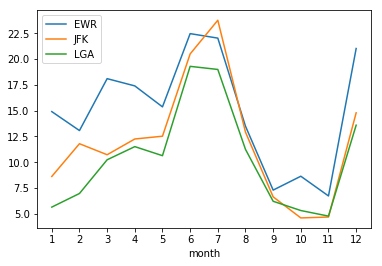

In [4]:
ts = flights.groupby([ 'origin','month'])['dep_delay'].mean()

ts['EWR'].plot(label = 'EWR')
ts['JFK'].plot(label = 'JFK')
ts['LGA'].plot(label = 'LGA')
plt.xticks(range(1,13,1))
plt.legend(loc = 'best', fontsize = 10)

Получаем, что в среднем наибольшие задержки происходят лето, особенно в июле

Заодно проверим суммарное количество задержек по месяцам

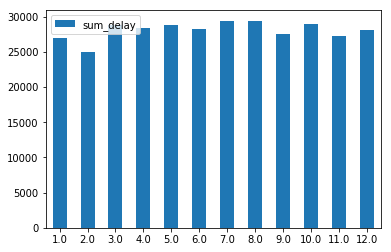

In [5]:
a = np.zeros((12,2))


for i in range(1,13, 1):
    a[i-1, 0]+=len(flights[flights['month'] == i]['dep_delay'])
    a[i-1, 1]=i
    
df = pd.DataFrame({'sum_delay':  a[:, 0]},  index = a[:, 1])

ax = df.plot.bar(rot=0)

Как можем заметить в каждый месяц суммарно (по количеству) происходит примерно одинаковое количество задержек

Посмотрим на самолеты с наибольшей средней задержкой:

In [6]:
aircraft =  flights[['carrier', 'dep_delay']]

aircraft = aircraft.groupby(['carrier'])['dep_delay'].mean().sort_values()[::-1]

aircraft.head(3)

carrier
F9    20.215543
EV    19.955390
YV    18.996330
Name: dep_delay, dtype: float64

А теперь с наименьшей средней задержкой:

In [7]:
aircraft.tail(3)

carrier
AS    5.804775
HA    4.900585
US    3.782418
Name: dep_delay, dtype: float64

Избавимся от ненужных столбцов и сольем таблицы

In [8]:
flights = flights.drop('origin', axis = 1)
flights = flights.drop('tailnum', axis = 1)
flights = flights.drop('flight', axis = 1)
flights = flights.drop('dep_time', axis = 1)
flights = flights.drop('arr_time', axis = 1)
flights['month'] = flights['month'].apply(lambda x: float(x))
flights['day'] = flights['day'].apply(lambda x: float(x))
flights = flights.drop('Unnamed: 0', axis = 1)
flights.tail(5)

,year,month,day,dep_delay,arr_delay,carrier,dest,air_time,distance,hour,minute
336771,2013,9.0,30.0,NaN,NaN,9E,DCA,NaN,213,NaN,NaN
336772,2013,9.0,30.0,NaN,NaN,9E,SYR,NaN,198,NaN,NaN
336773,2013,9.0,30.0,NaN,NaN,MQ,BNA,NaN,764,NaN,NaN
336774,2013,9.0,30.0,NaN,NaN,MQ,CLE,NaN,419,NaN,NaN
336775,2013,9.0,30.0,NaN,NaN,MQ,RDU,NaN,431,NaN,NaN


In [9]:
#df.join(other, lsuffix='_caller', rsuffix='_other')

flights = flights.join(weather, lsuffix='_caller', rsuffix='_other')
flights.columns

Index(['year_caller', 'month_caller', 'day_caller', 'dep_delay', 'arr_delay',
       'carrier', 'dest', 'air_time', 'distance', 'hour_caller', 'minute',
       'Unnamed: 0', 'origin', 'year_other', 'month_other', 'day_other',
       'hour_other', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

Text(0,0.5,'avrg_distance')

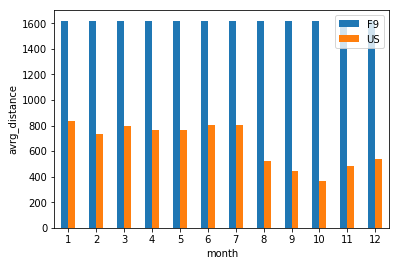

In [10]:
a = flights[flights['carrier'] == 'F9'].groupby(['month_other'])['distance'].mean()
b = flights[flights['carrier'] == 'US'].groupby(['month_other'])['distance'].mean()


index = range(1,13)
df = pd.DataFrame({'F9': a, 'US': b}, index=index)
ax = df.plot.bar(rot=0)
ax.set_xlabel('month')
ax.set_ylabel('avrg_distance')

Как мы можем заметить самый задерживающийся самолет в среднем месячно летает на расстояния примерно в 2 раза большие, чем самые не  задерживающийся самолет

Теперь посмотрим на разность в погодных показателях 

Рассмотрим для начала скорости ветра:

Text(0,0.5,'wind_speed')

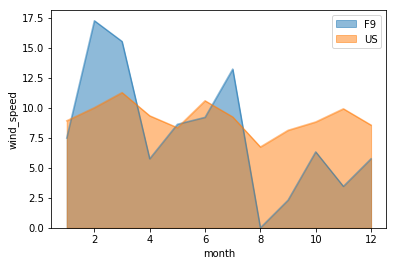

In [44]:
a = flights[flights['carrier'] == 'F9'].groupby(['month_other'])['wind_speed'].mean()
b = flights[flights['carrier'] == 'US'].groupby(['month_other'])['wind_speed'].mean()

index = range(1,13)
df = pd.DataFrame({'F9': a, 'US': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('wind_speed')

Как мы можем видеть скорость ветра не вляет на задержку самолета.

А что по поводу температуры? Проведем сравнение показателя влажности

Text(0,0.5,'humid')

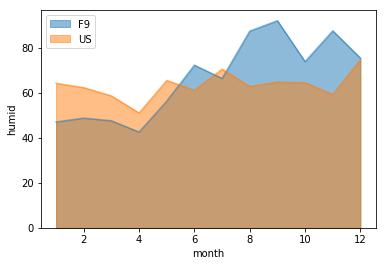

In [12]:
a = flights[flights['carrier'] == 'F9'].groupby(['month_other'])['humid'].mean()
b = flights[flights['carrier'] == 'US'].groupby(['month_other'])['humid'].mean()

index = range(1,13)
df = pd.DataFrame({'F9': a, 'US': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('humid')

Как мы можем заметить, влажность не влияет на задержку

Также проверим показатель видимости

Text(0,0.5,'visib')

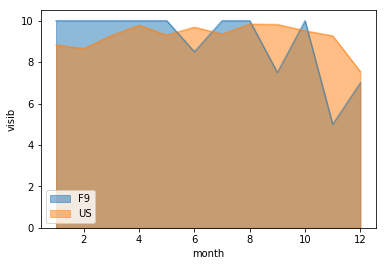

In [27]:
a = flights[flights['carrier'] == 'F9'].groupby(['month_other'])['visib'].mean()
b = flights[flights['carrier'] == 'US'].groupby(['month_other'])['visib'].mean()

index = range(1,13)
df = pd.DataFrame({'F9': a, 'US': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('visib')

Снова делаем тот же вывод

Посмотрим на влияние порывов ветра

Text(0,0.5,'wind_gust')

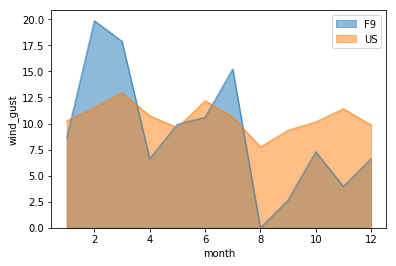

In [28]:
a = flights[flights['carrier'] == 'F9'].groupby(['month_other'])['wind_gust'].mean()
b = flights[flights['carrier'] == 'US'].groupby(['month_other'])['wind_gust'].mean()

index = range(1,13)
df = pd.DataFrame({'F9': a, 'US': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('wind_gust')

Понимаем, что порывы ветра не сильно влияют на задержку.

Посмотрим на среднее количество осадков

Text(0,0.5,'precip')

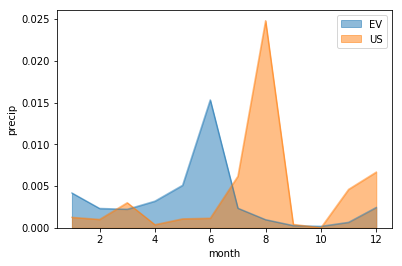

In [45]:
a = flights[flights['carrier'] == 'EV'].groupby(['month_other'])['precip'].mean()
b = flights[flights['carrier'] == 'US'].groupby(['month_other'])['precip'].mean()

#для самолета F9 данные были не наглядными, поэтому поменял на самолет EV

index = range(1,13)
df = pd.DataFrame({'EV': a, 'US': b}, index=index)


ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('precip')


Опять это оказалось малоинформативно

По итогу мы ничего не получили, кроме той информации, что задержка зависит от средней дистанции, которую должен преодолеть самолет

Попробуем немного другой подход:

Мы все еще обладаем  информацией, что наибольшая задержка происходит летом, попробуем выяснить какие температурные показатели меняются по сравнению с другими месяцами

Посмотрим на самые задерживающиеся (в среднем)  направления в июле как  в самом "плохом" месяце

In [13]:
flights.columns
flights.tail()

a = flights[flights['month_caller'] == 7.0]

c = a.groupby(['dest'])['dep_delay'].mean().sort_values()[::-1].head(4)

In [14]:
d = a.groupby(['dest'])['dep_delay'].mean().sort_values()[::-1].tail(3)

In [15]:
c, d

(dest
 LGA          NaN
 TUL    72.615385
 CAE    69.428571
 BHM    64.640000
 Name: dep_delay, dtype: float64, dest
 MYR    2.500000
 STT    0.384615
 BZN   -4.125000
 Name: dep_delay, dtype: float64)

Получили список направлений и задержек по ним:

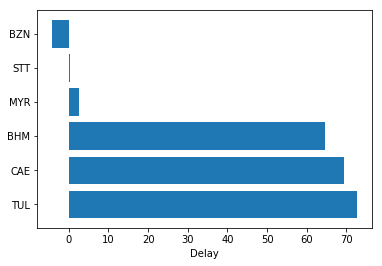

In [16]:
names = 'TUL', 'CAE', 'BHM', 'MYR','STT','BZN'

weights = []
weights.append(c[1])
weights.append(c[2])
weights.append(c[3])
weights.append(d[-3])
weights.append(d[-2])
weights.append(d[-1])

fig, ax = plt.subplots()
y_pos = np.arange(len(names))
ax.barh(y_pos, weights, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.set_xlabel('Delay')

plt.show()


Тут мы можем увидеть насколько сильно направление полета влияет на задержку

Посмотрим чем природно отличается направление TUL от BZN

Text(0,0.5,'humid')

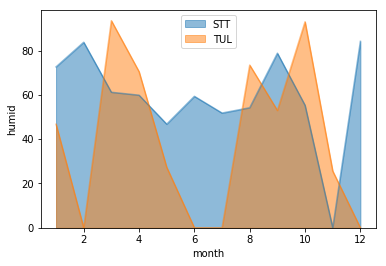

In [17]:
a = flights[flights['dest'] == 'TUL'].groupby(['month_other'])['humid'].mean()
b = flights[flights['dest'] == 'STT'].groupby(['month_other'])['humid'].mean()
#a.head(5)
index = range(1,13)
df = pd.DataFrame({'TUL': a, 'STT': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('humid')

Как мы можем заметить из графика в июле во время вылета по направлению STT средняя влажность порядком выше, чем у TUL, поэтому нам кажется, что мы можем сделать вывод о том, что влажность влияет на задержку, но... Рассмотрим еще пару направлений (1 из самых задерживающихся и одну с противоположной стороны)

Text(0,0.5,'humid')

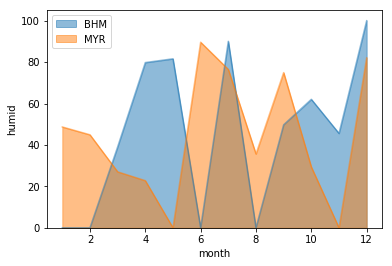

In [18]:
a = flights[flights['dest'] == 'BHM'].groupby(['month_other'])['humid'].mean()
b = flights[flights['dest'] == 'MYR'].groupby(['month_other'])['humid'].mean()
#a.head(5)
index = range(1,13)
df = pd.DataFrame({'BHM': a, 'MYR': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('humid')

Теперь мы видим, что в июле средняя  влажность является примерно одинаковой, поэтому мы лишний раз убеждаемся, что влажность не оказывает сильного влияния на время задержки

Посмотрим теперь на сравнение среднего врмени в пути по этим направлениям

Text(0,0.5,'air_time')

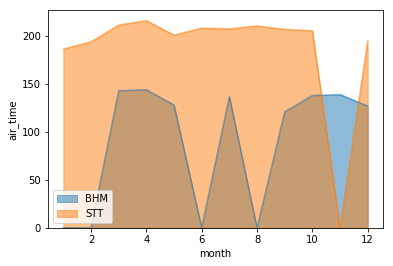

In [38]:
a = flights[flights['dest'] == 'BHM'].groupby(['month_other'])['air_time'].mean()
b = flights[flights['dest'] == 'STT'].groupby(['month_other'])['air_time'].mean()

#a.head(5)
index = range(1,13)
df = pd.DataFrame({'BHM': a, 'STT': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('air_time')

Получаем, что чем меньше время в пути - тем больше задержка

Теперь посмотрим на порывы ветра

Text(0,0.5,'wind_gust')

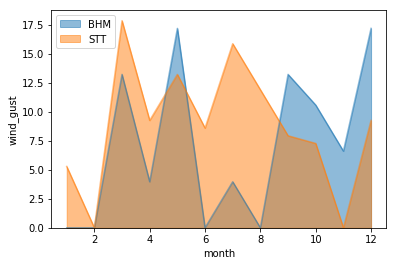

In [47]:
a = flights[flights['dest'] == 'BHM'].groupby(['month_other'])['wind_gust'].mean()
b = flights[flights['dest'] == 'STT'].groupby(['month_other'])['wind_gust'].mean()

#a.head(5)
index = range(1,13)
df = pd.DataFrame({'BHM': a, 'STT': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('wind_gust')

Text(0,0.5,'wind_gust')

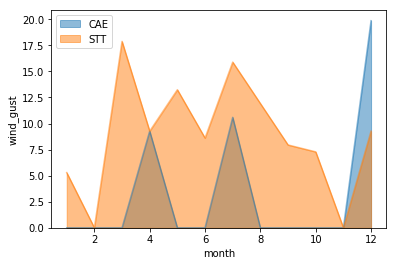

In [48]:
a = flights[flights['dest'] == 'CAE'].groupby(['month_other'])['wind_gust'].mean()
b = flights[flights['dest'] == 'STT'].groupby(['month_other'])['wind_gust'].mean()

#a.head(5)
index = range(1,13)
df = pd.DataFrame({'CAE': a, 'STT': b}, index=index)

ax = df.plot.area(stacked=False)

ax.set_xlabel('month')
ax.set_ylabel('wind_gust')

Можем предположить из графиков выше, что средние порывы ветра могут оказывать влияние на летние  перелеты, но учитывая рассуждения (в среднем порывы ветра не влияют на задержку),сделанные из другого анализа, вполне разумным будет сделать вывод, что порывы ветра в совокупности с другими летними факторами и дают эту задержку.

Вывод: на задержки влияет расстояние, которое  проделывает самолет и в летнее время видимость (в совокупности с другими факторами может дать задержку)